## Configuration Parameters
* <font color="red">agent_count = {100, 1000}</font>  
* m0 = 10  
* new_follows = 10  
* ticks = 1000  
* <font color="red">addfriends = {'Hyb', 'NoN', 'Rdm'}</font>  
* backfire = 0.4  
* befriend = 0.2  
* <font color="red">unfriend = {0.4, 0.8, 1.2}</font>  
* own_opinion_weight = 0.95  
* unfriend_rate = 0.05  
* min_friends_count = 5   

Parameters in red font are experiment variables.

In [1]:
# imports
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
# configurations for reference
configs = pd.DataFrame(
    {
        'ConfigNr': range(1, 19),
        'FriendRecTechnique': ['Hyb', 'NoN', 'Rdm'] * 6,
        'UnfriendThresh': (['low'] * 3 + ['medium'] * 3 + ['high'] * 3) * 2,
        'AgentCount': [100] * 9 + [1000] * 9
    }
)

## Differences caused by Unfriend Threshold?

In [44]:
hyb_04_1000 = pd.read_csv(os.path.join('dataexchange', 'BAv2_run10', 'agent_log.csv'))
hyb_08_1000 = pd.read_csv(os.path.join('dataexchange', 'BAv2_run13', 'agent_log.csv'))
hyb_12_1000 = pd.read_csv(os.path.join('dataexchange', 'BAv2_run16', 'agent_log.csv'))

In [45]:
hyb_04_1000['UnfriendThresh'] = 'low'
hyb_08_1000['UnfriendThresh'] = 'medium'
hyb_12_1000['UnfriendThresh'] = 'high'

In [46]:
hybrid_1000 = pd.concat(
    [hyb_04_1000, hyb_08_1000, hyb_12_1000], axis=0
).reset_index(drop=True)

In [47]:
hybrid_1000['UnfriendThresh'] = hybrid_1000['UnfriendThresh'].astype('category')

In [48]:
hybrid_1000.columns

Index(['TickNr', 'AgentID', 'Opinion', 'PerceivPublOpinion', 'Indegree',
       'Outdegree', 'Centrality', 'CC', 'Component', 'UnfriendThresh'],
      dtype='object')

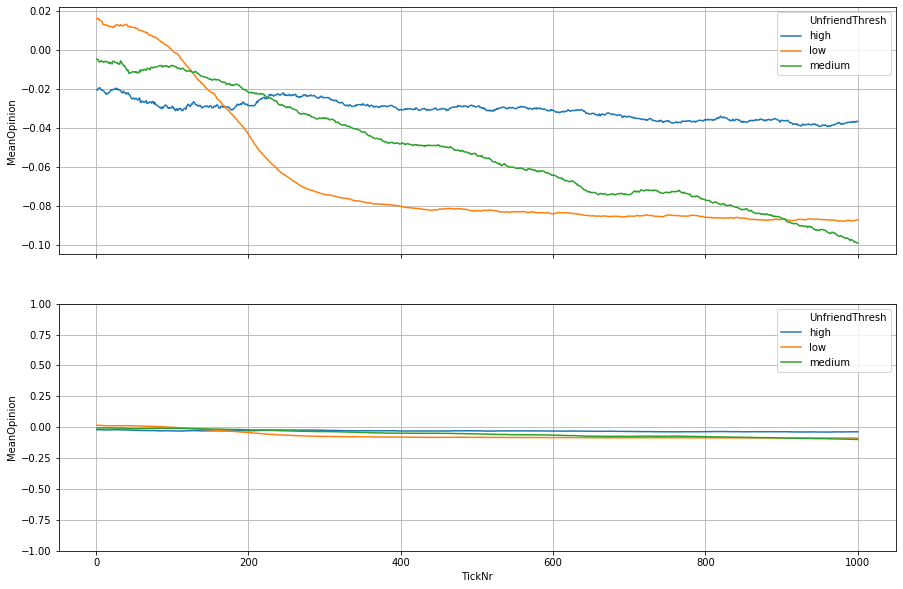

In [66]:
# reformat data
df = hybrid_1000.loc[:, ['TickNr', 'Opinion', 'UnfriendThresh']]
df = df.groupby(['TickNr', 'UnfriendThresh']).agg({'Opinion': 'mean'}).reset_index()
df.rename(mapper={'Opinion': 'MeanOpinion'}, axis=1, inplace=True)

# plot
fig, ax = plt.subplots(2, sharex=True, figsize=(15, 10))

plt.axes(ax[0])
sns.lineplot(x='TickNr', y='MeanOpinion', hue='UnfriendThresh', data=df)
plt.grid(b=True, axis='both')

plt.axes(ax[1])
sns.lineplot(x='TickNr', y='MeanOpinion', hue='UnfriendThresh', data=df)
plt.ylim(-1., 1.)
plt.grid(b=True, axis='both')
plt.show()

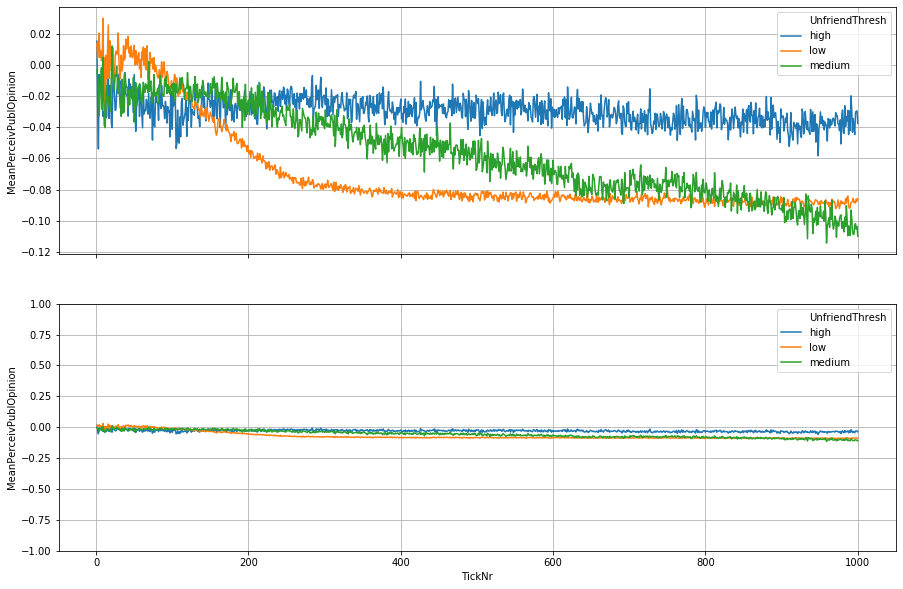

In [67]:
# reformat data
df = hybrid_1000.loc[:, ['TickNr', 'PerceivPublOpinion', 'UnfriendThresh']]
df = df.groupby(['TickNr', 'UnfriendThresh']).agg({'PerceivPublOpinion': 'mean'}).reset_index()
df.rename(mapper={'PerceivPublOpinion': 'MeanPerceivPublOpinion'}, axis=1, inplace=True)

# plot
# plot
fig, ax = plt.subplots(2, sharex=True, figsize=(15, 10))

plt.axes(ax[0])
sns.lineplot(x='TickNr', y='MeanPerceivPublOpinion', hue='UnfriendThresh', data=df)
plt.grid(b=True, axis='both')

plt.axes(ax[1])
sns.lineplot(x='TickNr', y='MeanPerceivPublOpinion', hue='UnfriendThresh', data=df)
plt.ylim(-1., 1.)
plt.grid(b=True, axis='both')
plt.show()

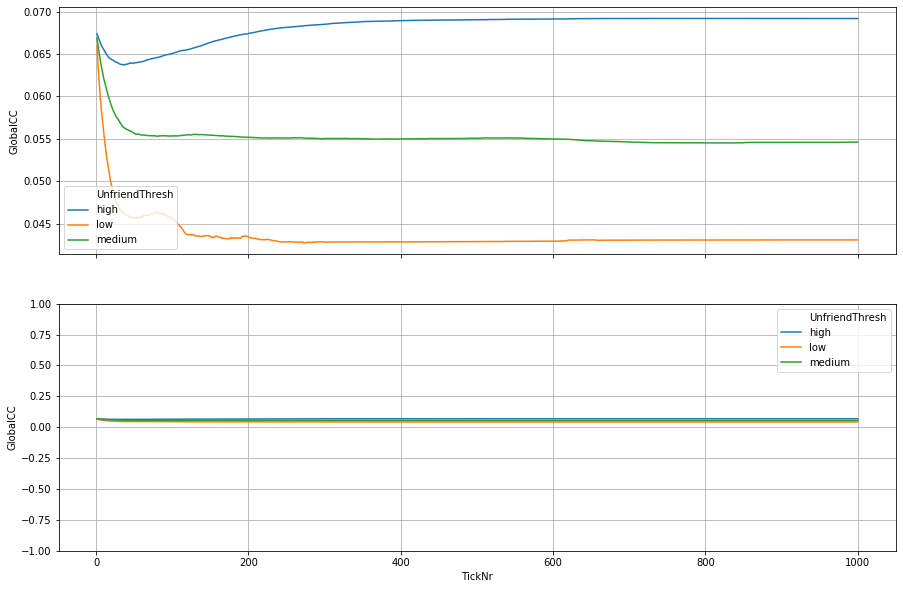

In [68]:
# reformat data
df = hybrid_1000.loc[:, ['TickNr', 'CC', 'UnfriendThresh']]
df = df.groupby(['TickNr', 'UnfriendThresh']).agg({'CC': 'mean'}).reset_index()
df.rename(mapper={'CC': 'GlobalCC'}, axis=1, inplace=True)

# plot
fig, ax = plt.subplots(2, sharex=True, figsize=(15, 10))

plt.axes(ax[0])
sns.lineplot(x='TickNr', y='GlobalCC', hue='UnfriendThresh', data=df)
plt.grid(b=True, axis='both')

plt.axes(ax[1])
sns.lineplot(x='TickNr', y='GlobalCC', hue='UnfriendThresh', data=df)
plt.ylim(-1., 1.)
plt.grid(b=True, axis='both')

plt.show()

## Analysis of Components

In [77]:
from string import ascii_lowercase

In [69]:
hybrid_1000.columns

Index(['TickNr', 'AgentID', 'Opinion', 'PerceivPublOpinion', 'Indegree',
       'Outdegree', 'Centrality', 'CC', 'Component', 'UnfriendThresh'],
      dtype='object')

In [87]:
df = hybrid_1000[
    (hybrid_1000['TickNr'] == 1000) & (hybrid_1000['UnfriendThresh'] == 'high')
].loc[:, ['Opinion', 'Component', 'UnfriendThresh']]

In [88]:
df['Component'] = df['Component'].astype('category')

In [82]:
df['Component'].cat.rename_categories([ascii_lowercase[i] for i in range(len(df['Component'].cat.categories))])

1999000    a
1999001    a
1999002    a
1999003    a
1999004    a
          ..
1999995    a
1999996    a
1999997    a
1999998    a
1999999    a
Name: Component, Length: 1000, dtype: category
Categories (1, object): [a]

In [89]:
len(df['Component'].cat.categories)

1

#### New Try

In [103]:
non_04_1000 = pd.read_csv(os.path.join('dataexchange', 'BAv2_run11', 'agent_log.csv'))
non_04_1000.head()

TickNr  AgentID   Opinion  PerceivPublOpinion  Indegree  Outdegree  \
0       1        1 -0.231624            0.256993       207        208   
1       1        2 -0.177731            0.067135       190        197   
2       1        3  0.517050           -0.160254       210        211   
3       1        4  0.162927            0.167900       190        196   
4       1        5 -0.987507           -0.388236       185        174   

   Centrality        CC  Component  
0    0.558101  0.079116          1  
1    0.554692  0.081764          1  
2    0.559037  0.078498          1  
3    0.554384  0.076792          1  
4    0.547697  0.079465          1

In [111]:
df = non_04_1000[non_04_1000['TickNr'] == 1000].loc[:, ['Opinion', 'Component']]

In [113]:
df['Component'] = df['Component'].astype('category')

In [114]:
df['Component'].cat.rename_categories(
    [ascii_lowercase[i] for i in range(len(df['Component'].cat.categories))],
    inplace=True
)

In [115]:
len(df['Component'].cat.categories)

2

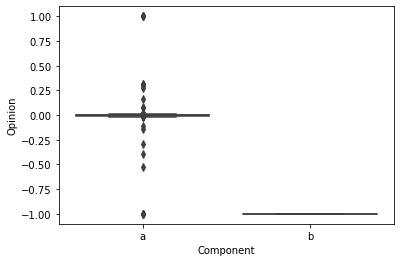

In [118]:
sns.boxplot(x='Component', y='Opinion', data=df)
plt.show()

In [117]:
df[df['Component'] == 'b']

Opinion Component
999368     -1.0         b

# Exploratory 1

In [ ]:
BAv2_run01 = pd.read_csv(os.path.join('dataexchange', 'BAv2_run01', 'agent_log.csv'))

In [ ]:
BAv2_run01.head()

In [ ]:
sns.scatterplot(x='Opinion', y='PerceivPublOpinion', data=BAv2_run01, alpha=0.01)
plt.show()

In [ ]:
g = sns.jointplot(
    x='Indegree', y='Outdegree', data=BAv2_run01, 
    kind='scatter', alpha=0.05)
plt.show()

In [ ]:
opinion_dev = BAv2_run01.groupby('TickNr').agg(
    {
        'Opinion': 'mean',
        'PerceivPublOpinion': 'mean',
        'CC': 'mean'
    }
)
opinion_dev.reset_index(inplace=True)
opinion_dev.head()

In [ ]:
fig, ax = plt.subplots(3, sharex=True, figsize=(15, 10))

plt.axes(ax[0])
sns.lineplot(x='TickNr', y='Opinion', data=opinion_dev)
plt.ylim(-0.3, 0.3)
plt.axhline(y=0, color='black', linewidth=0.7)
plt.grid(b=True, axis='both')
plt.ylabel('Opinion')

plt.axes(ax[1])
sns.lineplot(x='TickNr', y='PerceivPublOpinion', data=opinion_dev)
plt.ylim(-0.3, 0.3)
plt.axhline(y=0, color='black', linewidth=0.7)
plt.grid(b=True, axis='both')
plt.ylabel('Perceived Public Opinion')

plt.axes(ax[2])
sns.lineplot(x='TickNr', y='CC', data=opinion_dev)
plt.ylim(0, 0.3)
plt.axhline(y=0, color='black', linewidth=0.7)
plt.grid(b=True, axis='both')
plt.ylabel('Clustering Coefficient')

plt.show()

In [ ]:
BAv2_run01.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data_sub_1 = BAv2_run01.loc[:, ['TickNr', 'Indegree', 'Centrality']]

data_sub_1['Indegree_categorical'] = pd.cut(
    data_sub_1['Indegree'],
    bins=3,
    labels=['low', 'medium', 'high']
)

data_sub_2 = data_sub_1.groupby(['TickNr', 'Indegree_categorical']).agg({'Centrality': 'mean'}).reset_index()

In [ ]:
data_sub_2.head()

In [ ]:
sns.lineplot(x='TickNr', y='Centrality', hue='Indegree_categorical', data=data_sub_2)
plt.show()

In [ ]:
data_sub_3 = BAv2_run01.loc[:, ['TickNr', 'Outdegree', 'PerceivPublOpinion']]

data_sub_3['Outdegree_categorical'] = pd.cut(
    data_sub_3['Outdegree'],
    bins=[0, data_sub_3['Outdegree'].mean(), data_sub_3['Outdegree'].max()],
    labels=['low', 'high']
)

data_sub_4 = data_sub_3.groupby(['TickNr', 'Outdegree_categorical']).agg({'PerceivPublOpinion': 'mean'}).reset_index()

In [ ]:
data_sub_4.head()

In [ ]:
plt.figure(figsize=(15, 5))
plt.grid(b=True, axis='both')
sns.lineplot(x='TickNr', y='PerceivPublOpinion', hue='Outdegree_categorical', data=data_sub_4, alpha=0.5)
plt.ylim(-0.3, 0.3)
plt.show()

In [ ]:
BAv2_run01 = pd.read_csv(os.path.join('dataexchange', 'BAv2_run01', 'agent_log.csv'))
BAv2_run02 = pd.read_csv(os.path.join('dataexchange', 'BAv2_run02', 'agent_log.csv'))
BAv2_run03 = pd.read_csv(os.path.join('dataexchange', 'BAv2_run03', 'agent_log.csv'))

# New Try 3

In [132]:
configs.iloc[0, 1] + '_' + configs.iloc[0, 2] + '_' + str(configs.iloc[0, 3]) 

'Hyb_low_100'

In [137]:
'14'.zfill(2)

'14'

In [146]:
data = {}
for idx in range(len(configs)):
    cfg = configs.iloc[idx, 1] + '_' + configs.iloc[idx, 2] + '_' + str(configs.iloc[idx, 3])
    data[cfg] = pd.read_csv(os.path.join('dataexchange', 'BAv2_run' + str(idx + 1).zfill(2), 'agent_log.csv'))
    data[cfg]['FriendRecScheme'] = configs.iloc[idx, 1]
    data[cfg]['UnfriendThresh'] = configs.iloc[idx, 2]
    data[cfg]['AgentCount'] = str(configs.iloc[idx, 3])

In [147]:
data['Hyb_low_100']

TickNr  AgentID   Opinion  PerceivPublOpinion  Indegree  Outdegree  \
0           1        1  0.303008           -0.034709        26         28   
1           1        2  0.766807           -0.225914        26         28   
2           1        3  0.802710           -0.267763        31         30   
3           1        4 -0.232500           -0.343877        11         11   
4           1        5  0.403752            0.224035        22         22   
...       ...      ...       ...                 ...       ...        ...   
99995    1000       96  0.275972            0.309517         1          3   
99996    1000       97  0.266033            0.312748         6          7   
99997    1000       98 -0.349343           -0.314644         2          5   
99998    1000       99  0.279812            0.267078        12          7   
99999    1000      100 -0.342647           -0.306004         4          9   

       Centrality        CC  Component FriendRecScheme UnfriendThresh  \
0        0.575581  0.053809          1             Hyb            low   
1        0.582353  0.065339          1             Hyb            low   
2        0.589286  0.049727          1             Hyb            low   
3        0.492537  0.038961          1             Hyb            low   
4        0.559322  0.063425          1             Hyb            low   
...           ...       ...        ...             ...            ...   
99995    0.235375  0.250000          1             Hyb            low   
99996    0.248041  0.102564          1             Hyb            low   
99997    0.132231  0.309524          2             Hyb            low   
99998    0.276566  0.055556          1             Hyb            low   
99999    0.138528  0.179487          2             Hyb            low   

      AgentCount  
0            100  
1            100  
2            100  
3            100  
4            100  
...          ...  
99995        100  
99996        100  
99997        100  
99998        100  
99999        100  

[100000 rows x 12 columns]

In [158]:
def format_combine(data_dict, keys):
    return pd.concat(
        [data_dict[keys[i]] for i in range(len(keys))],
        axis=0
    ).reset_index().drop('Component', axis=1)

In [156]:
data.keys()

dict_keys(['Hyb_low_100', 'NoN_low_100', 'Rdm_low_100', 'Hyb_medium_100', 'NoN_medium_100', 'Rdm_medium_100', 'Hyb_high_100', 'NoN_high_100', 'Rdm_high_100', 'Hyb_low_1000', 'NoN_low_1000', 'Rdm_low_1000', 'Hyb_medium_1000', 'NoN_medium_1000', 'Rdm_medium_1000', 'Hyb_high_1000', 'NoN_high_1000', 'Rdm_high_1000'])

In [159]:
format_combine(data, ['Hyb_low_1000', 'NoN_low_1000', 'Rdm_low_1000'])

index  TickNr  AgentID   Opinion  PerceivPublOpinion  Indegree  \
0             0       1        1  0.074626            0.114526       179   
1             1       1        2 -0.426448           -0.106735       199   
2             2       1        3  0.198737            0.301213       208   
3             3       1        4 -0.953804            0.134694       163   
4             4       1        5  0.151070            0.449148       192   
...         ...     ...      ...       ...                 ...       ...   
2999995  999995    1000      996  0.049885            0.073621        41   
2999996  999996    1000      997  0.061613            0.054061        50   
2999997  999997    1000      998  0.056092            0.061930        22   
2999998  999998    1000      999  0.057190            0.028201        22   
2999999  999999    1000     1000  0.053950            0.035266        30   

         Outdegree  Centrality        CC FriendRecScheme UnfriendThresh  \
0              184    0.550717  0.074677             Hyb            low   
1              206    0.557478  0.072919             Hyb            low   
2              218    0.561236  0.076609             Hyb            low   
3              171    0.546798  0.091852             Hyb            low   
4              199    0.555309  0.077926             Hyb            low   
...            ...         ...       ...             ...            ...   
2999995         40    0.478448  0.047994             Rdm            low   
2999996         45    0.485659  0.043449             Rdm            low   
2999997         18    0.427106  0.032692             Rdm            low   
2999998         11    0.405933  0.014205             Rdm            low   
2999999         24    0.430789  0.033543             Rdm            low   

        AgentCount  
0             1000  
1             1000  
2             1000  
3             1000  
4             1000  
...            ...  
2999995       1000  
2999996       1000  
2999997       1000  
2999998       1000  
2999999       1000  

[3000000 rows x 12 columns]